In [1]:
# !pip install torch torchvision

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from keras.datasets import mnist
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_X.shape

(60000, 28, 28)

(<matplotlib.image.AxesImage at 0x7b5a935850c0>, 5)

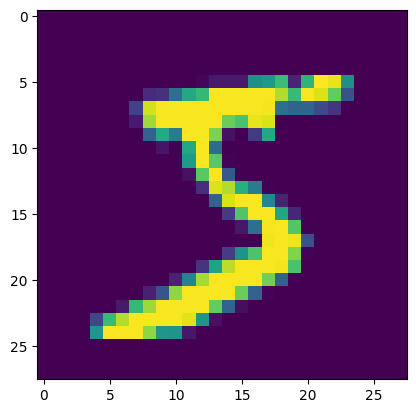

In [5]:
plt.imshow(train_X[0]),train_y[0]


In [6]:
# plt.imshow(train_X[1])

(array([38847859.,   571880.,   514157.,   438029.,   446644.,   503214.,
          469607.,   518723.,   611860.,  4118027.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

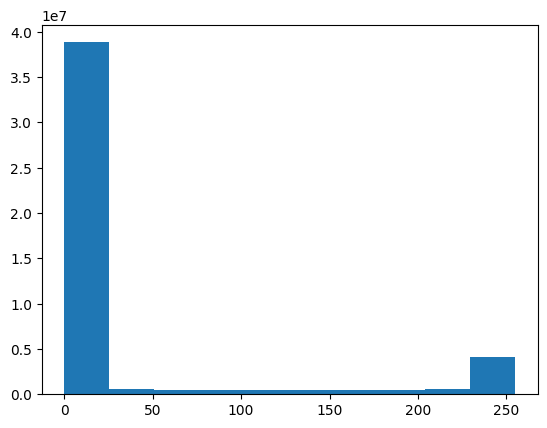

In [7]:
plt.hist(train_X.flatten())

In [8]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
#0,1 major

train_X = torch.tensor(train_X,dtype=torch.float32)/256.
train_y = torch.tensor(train_y,dtype=torch.long)

test_X =torch.tensor(test_X,dtype=torch.float32)/256.
test_y = torch.tensor(test_y,dtype=torch.long)

In [10]:
# plt.hist(train_X.flatten())


In [11]:
train_X.shape

torch.Size([60000, 28, 28])

In [12]:
#28*28=784

In [13]:
train_X=train_X.reshape([-1,28*28])
test_X=test_X.reshape([-1,28*28])

In [14]:
train_X.shape

torch.Size([60000, 784])

In [15]:
train_X[0].shape

torch.Size([784])

In [16]:
train_X[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [17]:
# len(set(list(test_y.numpy())))

Build the neural network
1 hidden layer of neuron size 100
output class 10

In [18]:
fc1 = nn.Linear(784,100)
final_layer = nn.Linear(100, 10)

In [19]:
batch_size =128

random_indexes = np.random.choice(range(0,len(train_y)),128)

In [20]:
x_train = np.take(train_X,random_indexes,0)
y_train = np.take(train_y,random_indexes,0)


In [21]:
x_train.shape

torch.Size([128, 784])

In [22]:
fc1.weight.shape

torch.Size([100, 784])

In [28]:
H1 = fc1(x_train).shape

In [30]:
H1_shape = tuple(H1)

H1_shape

(128, 100)

In [34]:
all_parameters = list(fc1.parameters())+list(final_layer.parameters())
all_parameters[0].shape

torch.Size([100, 784])

In [36]:
all_parameters = list(fc1.parameters())+list(final_layer.parameters())
all_parameters[1].shape

torch.Size([100])

In [37]:
len(all_parameters[0].flatten()) + len(all_parameters[1].flatten())

78500

In [38]:
optimizer = optim.SGD(all_parameters, lr=.001)
criterion = nn.CrossEntropyLoss()

In [39]:
optimizer.zero_grad()

In [40]:
H1 = F.relu(fc1(x_train))
H2 = F.relu(final_layer(H1))

In [41]:
H2[0]

tensor([0.0000, 0.0102, 0.0564, 0.0000, 0.0678, 0.0049, 0.0000, 0.0000, 0.0000,
        0.1008], grad_fn=<SelectBackward0>)

In [42]:
output =  F.log_softmax(H2, dim=1)

In [44]:
 output[0]

tensor([-2.3272, -2.3170, -2.2708, -2.3272, -2.2594, -2.3223, -2.3272, -2.3272,
        -2.3272, -2.2264], grad_fn=<SelectBackward0>)

In [46]:
y_train

tensor([6, 5, 3, 0, 1, 7, 2, 5, 4, 5, 3, 5, 2, 1, 0, 5, 2, 3, 1, 4, 2, 1, 9, 9,
        4, 7, 9, 0, 4, 8, 0, 3, 1, 0, 6, 8, 1, 5, 1, 9, 3, 2, 5, 5, 5, 9, 7, 5,
        3, 5, 3, 8, 0, 8, 0, 9, 2, 2, 4, 2, 2, 7, 3, 8, 0, 3, 2, 4, 9, 7, 3, 7,
        0, 6, 9, 0, 1, 5, 6, 4, 1, 8, 5, 1, 7, 1, 5, 1, 3, 8, 9, 6, 7, 6, 9, 0,
        3, 8, 6, 3, 1, 7, 9, 4, 1, 1, 0, 7, 2, 0, 0, 3, 7, 7, 9, 6, 6, 1, 4, 8,
        9, 9, 2, 3, 0, 0, 7, 9])

In [45]:
loss = criterion(H2, y_train)
loss

tensor(2.3085, grad_fn=<NllLossBackward0>)

In [54]:
print(fc1)

Linear(in_features=784, out_features=100, bias=True)


In [57]:
loss.backward()

In [58]:
optimizer.step()

In [59]:
y_train.shape

torch.Size([128])

In [61]:
fc1.weight[1][:100]

tensor([ 0.0108,  0.0357, -0.0107, -0.0206,  0.0240, -0.0357,  0.0300, -0.0315,
        -0.0259, -0.0171,  0.0329, -0.0147, -0.0042,  0.0068, -0.0009,  0.0008,
         0.0256, -0.0083, -0.0231,  0.0253, -0.0144,  0.0264,  0.0334, -0.0020,
        -0.0288,  0.0333, -0.0135, -0.0112,  0.0289, -0.0324,  0.0121, -0.0011,
         0.0318, -0.0268, -0.0274,  0.0290, -0.0194,  0.0339,  0.0007,  0.0355,
        -0.0101, -0.0329,  0.0341, -0.0066, -0.0066,  0.0240,  0.0050, -0.0188,
         0.0250, -0.0191, -0.0257, -0.0237,  0.0227,  0.0149,  0.0313,  0.0304,
         0.0002,  0.0049,  0.0052, -0.0086, -0.0356, -0.0275, -0.0001, -0.0171,
         0.0054, -0.0003, -0.0234, -0.0110, -0.0003, -0.0153,  0.0351,  0.0156,
        -0.0003,  0.0031,  0.0306, -0.0210, -0.0218,  0.0111, -0.0254, -0.0088,
        -0.0245,  0.0142, -0.0177,  0.0223, -0.0159, -0.0304,  0.0152, -0.0170,
        -0.0271, -0.0271, -0.0248,  0.0098, -0.0301, -0.0116, -0.0232,  0.0090,
         0.0331,  0.0103,  0.0250, -0.02

In [62]:
optimizer.step()
fc1.weight.grad[0]


tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -3.6051e-07, -1.6000e-05, -2.4

In [64]:
fc1 = nn.Linear(784, 100)
final_layer = nn.Linear(100, 10)
optimizer = optim.SGD(list(fc1.parameters())+list(final_layer.parameters()), lr=.001)
criterion = nn.CrossEntropyLoss()
batch_size = 128

In [ ]:
running_accuracy = []

for iteration in range(10000 ):

  random_indexes = np.random.choice(range(0,len(train_y)),128)

  x_train = Variable(np.take(train_X,random_indexes,0))
  y_train = Variable(np.take(train_y,random_indexes,0))

  optimizer.zero_grad()

  H1 = F.relu(fc1(x_train))
  H2 = F.relu(final_layer(H1))

  predicted_class = torch.argmax(H2,1)
  accuracy_running_one = sum(predicted_class == y_train)/128*100
  running_accuracy.append(accuracy_running_one)


  # output =  F.log_softmax(H2, dim=1)
  loss = criterion(H2, y_train)
  loss.backward()

  optimizer.step()





  if iteration%100 == 0:

    accuracy = sum(running_accuracy)/len(running_accuracy)
    running_accuracy = []


    H1 = F.relu(fc1(test_X))
    H2 = F.relu(final_layer(H1))

    predicted_class = torch.argmax(H2,1)
    test_accuracy = sum(predicted_class == test_y)/test_y.shape[0]*100




    print ("The iteration number is {} | and the loss it {}| Trainning Accuracy {}| Test Accuracy {}".format(iteration, loss.item(),accuracy,test_accuracy))

The iteration number is 0 | and the loss it 2.3013200759887695| Trainning Accuracy 7.03125| Test Accuracy 7.7699995040893555
The iteration number is 100 | and the loss it 2.297807455062866| Trainning Accuracy 9.078125| Test Accuracy 11.519999504089355
The iteration number is 200 | and the loss it 2.2832419872283936| Trainning Accuracy 13.390625| Test Accuracy 16.1200008392334
The iteration number is 300 | and the loss it 2.254507303237915| Trainning Accuracy 17.84375| Test Accuracy 20.530000686645508
The iteration number is 400 | and the loss it 2.2461116313934326| Trainning Accuracy 22.84375| Test Accuracy 27.73999786376953
The iteration number is 500 | and the loss it 2.23577618598938| Trainning Accuracy 30.78125| Test Accuracy 35.53000259399414
The iteration number is 600 | and the loss it 2.2179980278015137| Trainning Accuracy 38.21875| Test Accuracy 43.90999984741211
The iteration number is 700 | and the loss it 2.212531328201294| Trainning Accuracy 45.6640625| Test Accuracy 49.34